In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
total_ride_data = city_data.merge(ride_data, how ="left", on=["city", "city"])

# Display the data table for preview
total_ride_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [56]:
#group by type
ride_summary = total_ride_data.groupby(["city"])
ride_summary.head(1)


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
28,Williamsstad,59,Urban,2018-01-23 17:51:24,19.62,125986195523
51,Port Angela,67,Urban,2018-04-17 06:23:18,16.34,7120534266772
70,Rodneyfort,34,Urban,2018-02-10 23:22:03,23.44,5149245426178
93,West Robert,39,Urban,2018-02-15 04:21:47,12.28,1442502460354
124,West Anthony,70,Urban,2018-03-06 02:27:01,10.02,9396763280782
154,West Angela,48,Urban,2018-01-12 01:45:27,26.86,4820052223501
193,Martinezhaven,25,Urban,2018-03-19 15:31:26,5.30,264337981979
217,Karenberg,22,Urban,2018-03-11 17:26:12,36.15,7796761531541
234,Barajasview,26,Urban,2018-01-15 02:59:07,19.52,8268107272481


In [57]:
rides_df = pd.DataFrame({"Driver Count": ride_summary["driver_count"].mean()
                         ,"Avg Fare": round(ride_summary["fare"].mean(),2)
                          , "Number of Rides": ride_summary["type"].count()
                         , "Type": ride_summary["type"].unique()
                    })
rides_df.head()

,Driver Count,Avg Fare,Number of Rides,Type
city,,,,
Amandaburgh,12,24.64,18,[Urban]
Barajasview,26,25.33,22,[Urban]
Barronchester,11,36.42,16,[Suburban]
Bethanyland,22,32.96,18,[Suburban]
Bradshawfurt,7,40.06,10,[Rural]


## Bubble Plot of Ride Sharing Data

Circle Size is an indicator of the number of drivers in the city


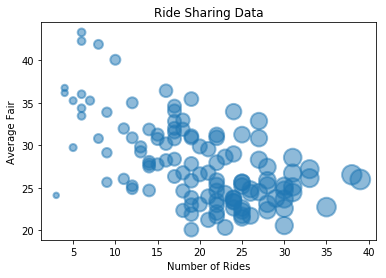

In [78]:
# Create a legend
plt.xlabel("Number of Rides")
plt.ylabel("Average Fair")
plt.title("Ride Sharing Data")



print("Circle Size is an indicator of the number of drivers in the city")

# Obtain the x and y coordinates for each of the three city types
x = rides_df["Number of Rides"]
y = rides_df["Avg Fare"]
z = rides_df["Number of Rides"]
# Build the scatter plots for each city types
plt.scatter(x, y, s=z*10, cmap = "Reds", alpha=0.5, linewidth = 2)

plt.show()

# Incorporate the other graph properties

# Incorporate a text label regarding circle size

# Save Figure


In [59]:
# Show plot
plt.show()

## Total Fares by City Type

In [ ]:
# Calculate Type Percents

# Build Pie Chart

# Save Figure


In [ ]:
# Show Figure
plt.show()

## Total Rides by City Type

In [ ]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure


In [ ]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [ ]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


In [ ]:
# Show Figure
plt.show()